Random generation uses seed 123
The generated multivariate time series has the shape (1000, 1)


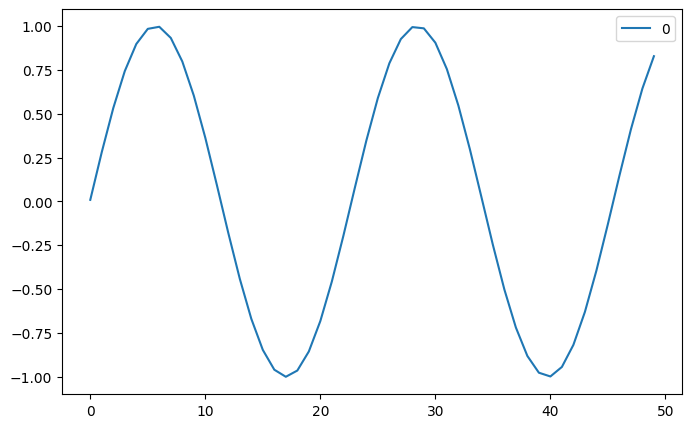

In [3]:
from data_loading import generate_sine_wave
import pandas as pd

seed = 123          # Initial seed for random generation, if not specified it's random
dim = 1             # Number of features in the multivariate series
n = 1000            # Number of samples
deterministic = False # No randomness will be applied if true

sines = generate_sine_wave(dim, n, seed, deterministic)
df = pd.DataFrame(sines)
print(f'The generated multivariate time series has the shape {df.shape}')
df[:50].plot(subplots=True, figsize=(8,5))
# df.to_csv(f'sine_data/sine_{seed}_{n}_{dim}.csv', index=False)
df.to_csv(f'sine_data/sine_{seed}_{n}_{dim}.csv')